# Machine Learning Introduction

## Predictive Machine Learning Modeling in Python with scikit-learn

### Michael Pyrcz, Associate Professor, University of Texas at Austin

### Machine Learning-based Prediction

Here's a simple workflow, demonstrate of training and tuning a machine learning model with simple dataset.

We build predictive machine learninng models with supervised learning

**Prediction**
* non-parametric method for regression (continuous response) and classification (categorical response)
* a function $\hat{f}$ of the nearest $k$ training data in predictor feature space such that we predict a response feature $Y$ from a set of predictor feature $X_1, \dots, X_k$
* the prediction of the form 

\begin{equation}
\hat{Y} = \hat{f}(X_1, \dots, X_k) + \epsilon
\end{equation}

where $\epsilon$ is an error term. 

**Supervised Learning**
* the response feature, $Y$, is available over the training and testing data.

### The Machine Learning Models

This workflow includes this following model
* decision tree regression

 ### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Set the random number seed
These workflows and models may use random process, e.g.
* random train and test split with cross validation and k-fold cross validaion
* random selection of a subset of features to consider for the next split


In [3]:
seed = 100
np.random.seed(seed)

### Read the data 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1D_Porosity.csv")
df.head()

,Depth,Nporosity
0,0.25,-1.37
1,0.50,-2.08
2,0.75,-1.67
3,1.00,-1.16
4,1.25,-0.24


In [5]:
X = pd.DataFrame(data = df.loc[:,'Depth'])
y = pd.DataFrame(data = df.loc[:,'Nporosity'])  # ensure that X and y are DataFrames
print('Loaded' + str(len(df))+ ' samples, with features = ' + str(df.columns.values) + '.')

Loaded40 samples, with features = ['Depth' 'Nporosity'].


### Plot Available Data

Let's do a simple scatter plot to check the data

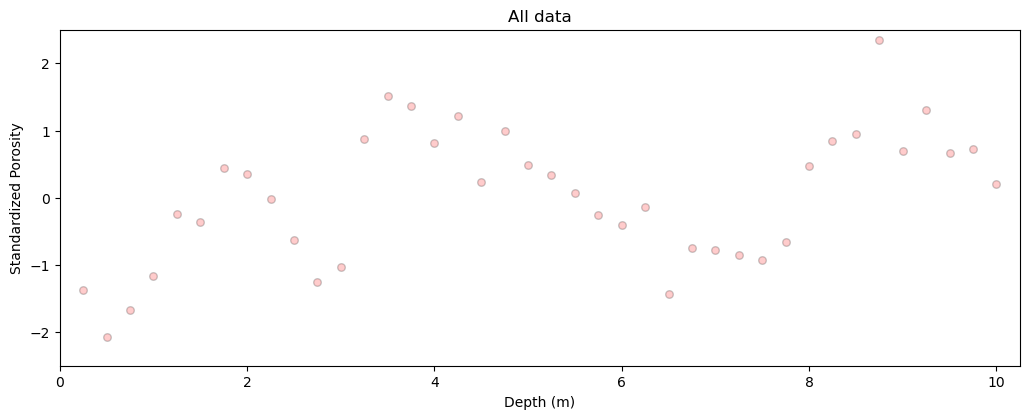

In [6]:
plt.scatter(X,y, color='red', s=30, ec='k', alpha=0.2)
plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity')
plt.title('All data')
plt.xlim([0,10.25])
plt.ylim([-2.5,2.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)

### Fast Forward Through Data Analytics

This workflow is focused on building machine learning predictive models
* for brevity we skip data checking, data analytics, statistical analytics, feature transformations, etc. 
* we skip all the way to model building
* we do not even discuss model selection, feature selection, nor robust hyperparameter tuning
This is the most simple predictive machine workflow possible!
* basic for machine learning with scikit-learn in Python. 

### Let's Build a Predictive Machine Learning Model!

We use the following steps to build predictive model
* **Instantiate**, the machine learning workflow with hyperparameters
* **fit**, train the machine learning model to the training data
* **predict**, check the trained models to predict at withheld testing data
* **select** the optimum hyperparameters, hyperparameter tuning
* **refit** the model by training with all data given the tuned hyperparameters.

We use the train - test approach, an alternative is the train, validate and test approach.
* we will start simple and cover k-fold cross validation and scikit-learn pipeline class later!

### Optional: Add Random Error to the Response feature, $y$

For more experiential learning consider repeating this workflow with different amounts of additional error.
* to observe issues of model overfit consider adding some additional error.


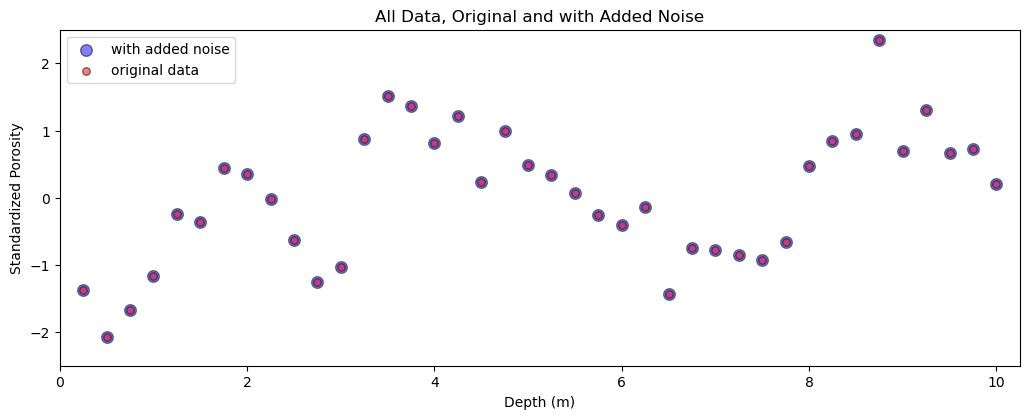

In [9]:
error_stdev = 0.0               # standard deviation of additional random error
y_orig = y.copy(deep=True)
y['Nporosity'] = y['Nporosity'] + np.random.normal(loc=0, scale = error_stdev, size=y.shape[0])
plt.scatter(X,y,s=70,color='blue',ec='k',alpha=0.5,label='with added noise')
plt.scatter(X,y_orig,s=30,color='red',ec='k',alpha=0.5,label='original data')

plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity')
plt.title('All Data, Original and with Added Noise')
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

### Split train and test
We will demonstrate the following hyperparameters tuning method
* **cross validation** - split 25% of data as withheld testing data, only 25% of data are tested.
* **k-fold cross validation** - calculate average error over k folds, all data are tested.

Let's start with cross validation and then demonstrate the k-fold cross validation.

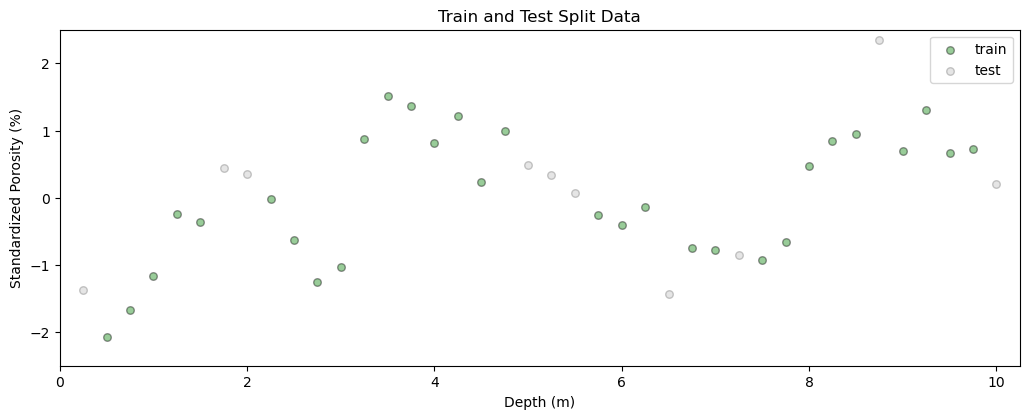

In [10]:
from sklearn.model_selection import train_test_split    # random train and test data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=seed)  # train test split
plt.scatter(X_train, y_train, s=30, color='green', ec='k', alpha=0.4, label='train')
plt.scatter(X_test, y_test, s=30, color='grey', ec='k', alpha=0.2, label='test')

plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity (%)')
plt.title('Train and Test Split Data')
plt.legend(loc='upper right')
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

### Build a Decision Tree Model

Let's instantiate (set the hyperparameter(s)) and fit (train with training data) a decision tree model to our data

In [11]:
from sklearn import tree    # tree program from scikit learn (package for machine learning )
max_leaf_nodes = 6
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)  # instantiate the model
our_tree = our_tree.fit(X_train, y_train)

### Predict with Decision Tree Model

Now let's make a prediction with our trained decision tree model.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


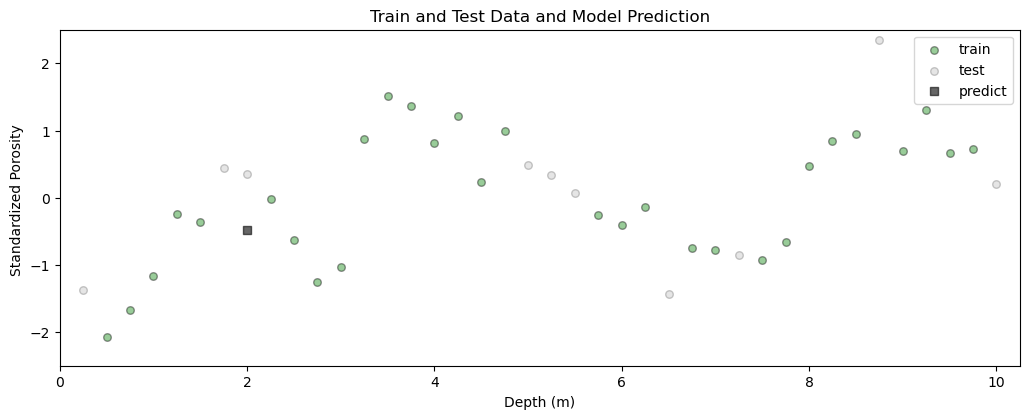

In [12]:
itest = 9; depth = X_test['Depth'].values[itest]      # set the predictor value for our prediction
spor = our_tree.predict([[depth]])
plt.scatter(X_train,y_train,color='green',s=30,ec='k',alpha=0.4,label='train')
plt.scatter(X_test,y_test,color='grey',s=30, ec='k', alpha=0.2, label='test')
plt.scatter(depth, spor, color='black',s=30,marker='s',alpha=0.6,label='predict')

plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity ')
plt.title('Train and Test Data and Model Prediction')
plt.legend(loc='upper right')
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

### Predict over a Range of Predictor Feature Values with a Decsion Tree Model

Now, let's make predictions over a range of predictor feature values so we can visualize the model.
* this is easy to do since we have just 1 predictor feature

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


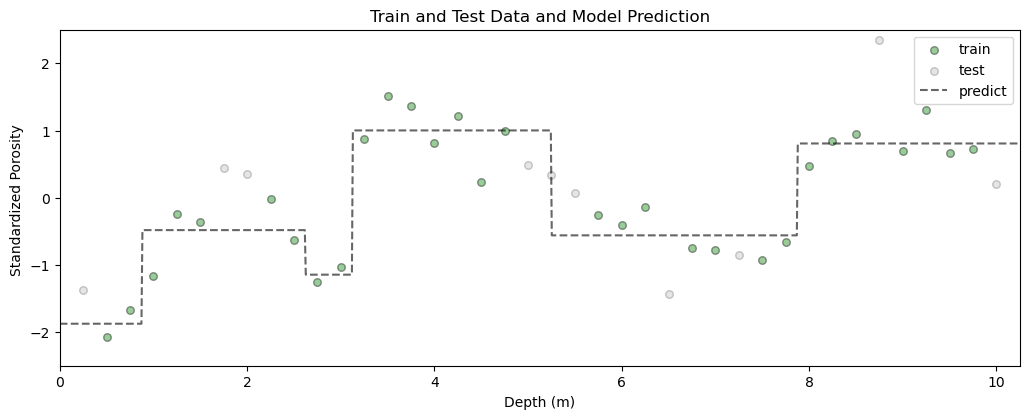

In [13]:
depths = np.linspace(0,10.25,1000)                  # set the predictor values for our prediction
spors = our_tree.predict(depths.reshape(-1,1))       # predict with our trained model
plt.scatter(X_train, y_train, color='green', s=30, ec='k', alpha=0.4, label='train')
plt.scatter(X_test, y_test, color='grey', s=30, ec='k', alpha=0.2, label='test')
plt.plot(depths, spors, color='black', alpha=0.6, label='predict', linestyle='--')

plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity ')
plt.title('Train and Test Data and Model Prediction')
plt.legend(loc='upper right')
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)

### Changing the Model Hyperparameter(s)

Let's try changing the model complexity and refitting the model

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


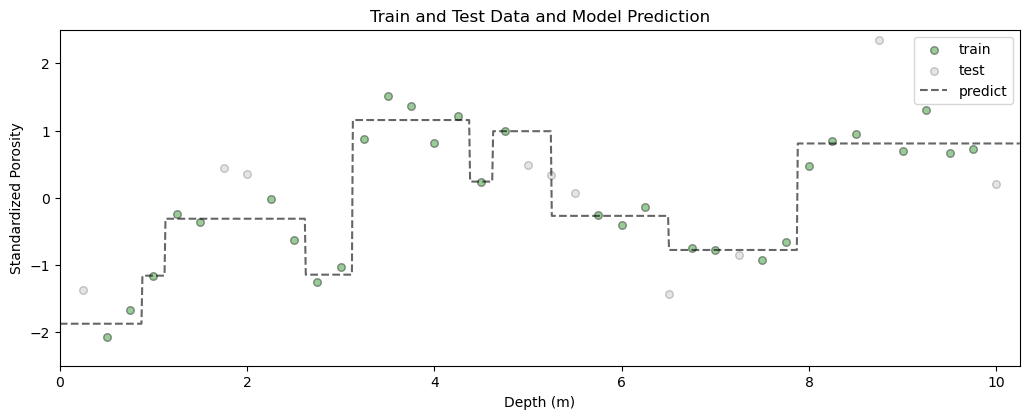

In [14]:
max_leaf_nodes = 10                                                      # set the hyperparameter
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes)   # instantiate the model
our_tree = our_tree.fit(X_train, y_train)
spors = our_tree.predict(depths.reshape(-1,1))

plt.scatter(X_train, y_train, color='green', s=30, ec='k', alpha=0.4, label='train')
plt.scatter(X_test, y_test, color='gray', s=30, ec='black', alpha=0.2, label='test')
plt.plot(depths, spors, color='black', alpha=0.6, label='predict', linestyle='--')

plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]);
plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity')
plt.title('Train and Test Data and Model Prediction')

plt.legend(loc='upper right');
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);


### Tuning the Model Hyperparameter(s)

To tune the model hyperparameters we need a metric to summarize model error over the withheld testing data 
* let's predict at the testing data and calculate our metric, testing mean squared error

In [15]:
from sklearn import metrics
leaf_nodes = 10
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_nodes)
our_tree = our_tree.fit(X_train, y_train)

y_predict = our_tree.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_predict)
print('Testing MSE is ' + str(round(mse,2)) + '.')

Testing MSE is 0.62.


### Tuning the Model Hyperparameter(s)

To tune the model hyperparameters we need to rebuild the model with variable level of complexity 
* for a more robust assessment of performance let's use scikit-learn k-fold cross validation

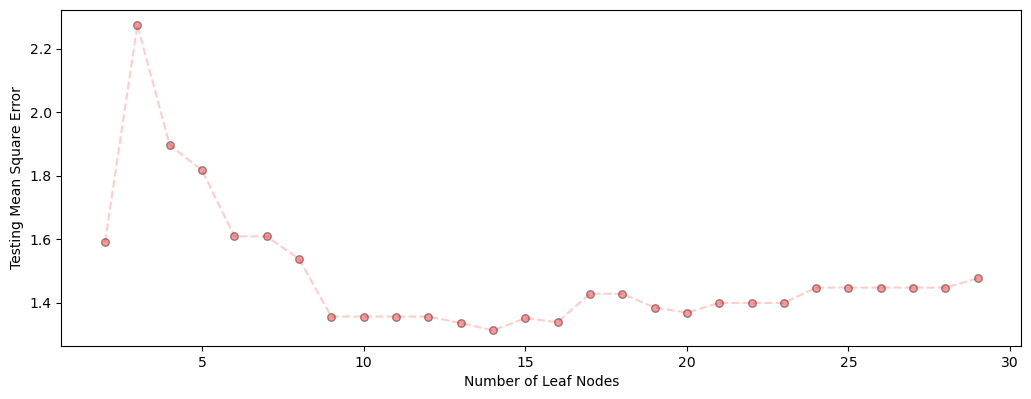

In [16]:
from sklearn.model_selection import cross_val_score as kfold
nodes = []
scores = []
max_leaf_nodes = 30
for i, nnode in enumerate(np.arange(2,max_leaf_nodes, 1, dtype=int)):
    our_tree = tree.DecisionTreeRegressor(max_leaf_nodes=nnode)
    nodes.append(nnode)
    scores.append(abs(kfold(estimator=our_tree, X=X, y=y, cv=4, n_jobs = 4, scoring='neg_mean_squared_error').mean()))
    
plt.scatter(nodes, scores, color='red',s=30, ec='k', alpha=0.4, label='train')
plt.plot(nodes, scores, color='red', alpha=0.2, linestyle='--')

plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Testing Mean Square Error')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

### Select the best Hyperparameter(s) and Re-train on All data

The main product from all of the previous work is the tuned hyperparameters, the optimum model complexity.
* now we refit the tuned model, train the model on all the data and our tuned model is ready for real-world use.
* once again we are assuming a train and test workflow, not a train, validate and test workflow. 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


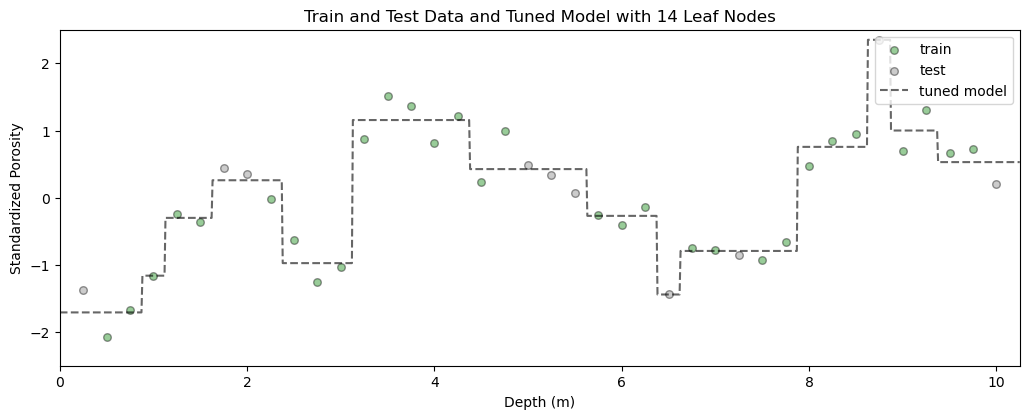

In [18]:
tuned_nodes = nodes[np.argmin(scores)]
our_tuned_tree = tree.DecisionTreeRegressor(max_leaf_nodes=tuned_nodes).fit(X,y)   # Instantiate / fit
tuned_spors = our_tuned_tree.predict(depths.reshape(-1,1))

plt.scatter(X_train, y_train, color='green', s=30, ec='k', alpha=0.4, label='train')
plt.scatter(X_test, y_test, color='grey', s=30, ec='k', alpha=0.4, label='test')
plt.plot(depths, tuned_spors, color='black', alpha=0.6, label='tuned model', linestyle='--')

plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity')
plt.title('Train and Test Data and Tuned Model with ' + str(tuned_nodes) + ' Leaf Nodes')
plt.xlim([0,10.25])
plt.ylim([-2.5,2.5])
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)

### Same complete workflow with Pipeline

Let's repeat the above workflow with a pipeline from scikit-learn. Here some general comments:
* **pipeline workflow steps** - list of steps, custom labels and the associated scikit-learn class
* **choices and hyperparameters** - as a dictionary with combined step custom labels and hyperparameter names 
* **workflow scenarios** - we can specify list of choices and hyperparameters
* **consistent iteration** - the entire workflow is repeated for the full combinatorial
* **best model selected** - best combination of model hyperparameters and choices are refit with all data

In [20]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([                                                   # the machine learning workflow as a pipeline object
    ('tree', tree.DecisionTreeRegressor())
])

params = {                                                           # the machine learning workflow method's parameters
    'tree__max_leaf_nodes': np.arange(2, max_leaf_nodes, 1, dtype=int)
}

from sklearn.model_selection import GridSearchCV                     # model hyperparameter grid search
grid_cv_tuned = GridSearchCV(pipe, params, scoring = 'neg_mean_squared_error',
                             cv=4, refit=True)

grid_cv_tuned.fit(X,y)

print('Tuned maximum number of leaf nodes = ' + str(grid_cv_tuned.best_params_['tree__max_leaf_nodes']) + '.')

depth = 2.5
print('Prediction at depth = ' + str(depth) + ' m is ' + str(np.round(grid_cv_tuned.predict([[depth]]),2)) + '.')


Tuned maximum number of leaf nodes = 14.
Prediction at depth = 2.5 m is [-0.97].


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
